In [1]:
!pip install jaxtyping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.4 MB/s eta 0:00:00


In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35664896.60it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1051260.48it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10254302.69it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4133332.34it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
subset_training_data = torch.utils.data.Subset(
    training_data,
    range(0, 1000)  # first 1000 examples
)

subset_test_data = torch.utils.data.Subset(
    test_data,
    range(0, 10)  # first 100 examples
)

In [5]:
import torch
from torch import nn
from jaxtyping import Float

class DigitRecognizer(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(784, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.output_layer = nn.Linear(512, 10)
        self.sigmoid = nn.Sigmoid()

    def forward(self, image: Float[torch.Tensor, "..."]) -> Float[torch.Tensor, "..."]:
      x = self.input_layer(image)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.output_layer(x)
      x = self.sigmoid(x)
      return x

In [6]:
model = DigitRecognizer()
# classification (probability based) problem, so we use cross entropy loss
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

epochs = 10
for epoch in range(epochs):
    for image, label in subset_training_data:
      image = image.view(image.shape[0], 784)
      labels = torch.zeros(10)
      labels[label] = 1
      # training loop
      prediction = model(image)
      # cancel out previous gradients
      optimizer.zero_grad()
      print(prediction)
      loss = loss_function(prediction, torch.tensor([label]))
      # calculate every single (netowrk weights) derivative required to perform gradient descent
      # derivative of loss function (error) with respect to every single parameter in the model
      loss.backward()
      # update the weights
      optimizer.step()

Streaming output truncated to the last 5000 lines.
         2.0697e-08, 2.6191e-15, 1.0000e+00, 1.2687e-11]],
       grad_fn=<SigmoidBackward0>)
tensor([[3.4366e-12, 1.1376e-12, 3.8861e-11, 1.1744e-11, 1.9070e-02, 3.0075e-13,
         1.4781e-08, 3.2427e-05, 7.9257e-07, 9.9998e-01]],
       grad_fn=<SigmoidBackward0>)
tensor([[2.3646e-03, 4.1594e-08, 1.5655e-08, 3.3303e-11, 1.3659e-06, 1.0000e+00,
         4.3861e-05, 8.9657e-10, 2.5307e-04, 5.6443e-06]],
       grad_fn=<SigmoidBackward0>)
tensor([[1.8289e-09, 3.6836e-10, 1.9844e-08, 2.1992e-07, 1.0000e+00, 1.3668e-03,
         1.2392e-06, 6.8276e-11, 1.5912e-06, 4.5850e-05]],
       grad_fn=<SigmoidBackward0>)
tensor([[7.9954e-12, 1.9600e-21, 3.0200e-12, 1.1834e-13, 8.4568e-15, 5.4644e-12,
         9.1769e-20, 1.0000e+00, 3.6369e-13, 2.7256e-10]],
       grad_fn=<SigmoidBackward0>)
tensor([[6.0790e-09, 5.9225e-12, 6.2048e-11, 1.8257e-10, 1.0000e+00, 1.1343e-09,
         4.1398e-06, 6.8416e-05, 6.9136e-10, 3.2098e-04]],
       grad_fn=

In [ ]:
model = DigitRecognizer()
# classification (probability based) problem, so we use cross entropy loss
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

epochs = 10
for epoch in range(epochs):
    for image, label in training_data:
      image = image.view(image.shape[0], 784)
      labels = torch.zeros(10)
      labels[label] = 1
      # training loop
      prediction = model(image)
      # cancel out previous gradients
      optimizer.zero_grad()
      print(prediction)
      loss = loss_function(prediction, torch.tensor([label]))
      # calculate every single (netowrk weights) derivative required to perform gradient descent
      # derivative of loss function (error) with respect to every single parameter in the model
      loss.backward()
      # update the weights
      optimizer.step()

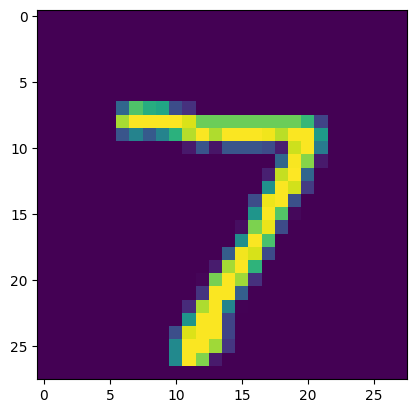

Predicted Digit: 7. Actual Digit: 7


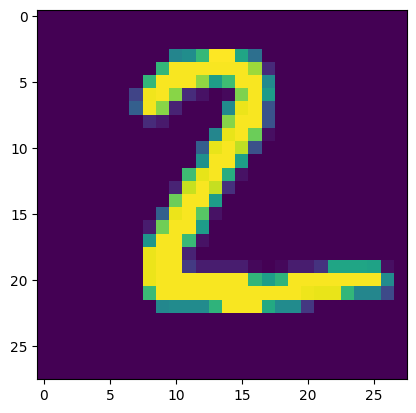

Predicted Digit: 2. Actual Digit: 2


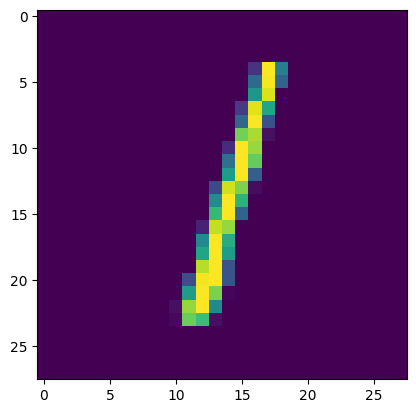

Predicted Digit: 1. Actual Digit: 1


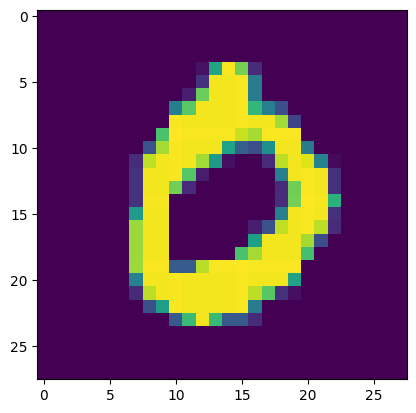

Predicted Digit: 0. Actual Digit: 0


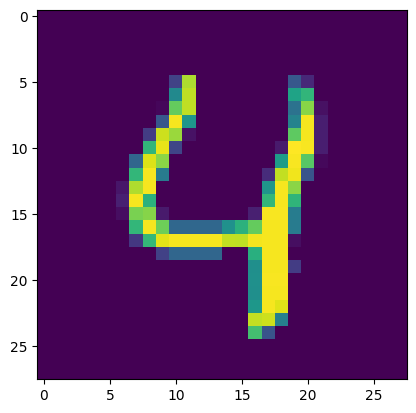

Predicted Digit: 4. Actual Digit: 4


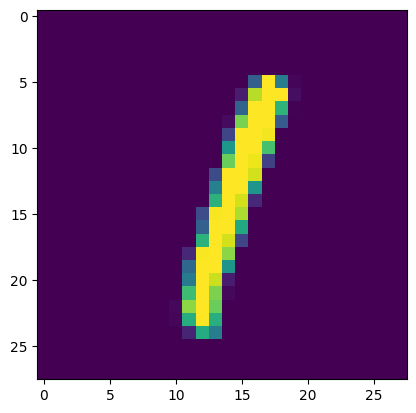

Predicted Digit: 1. Actual Digit: 1


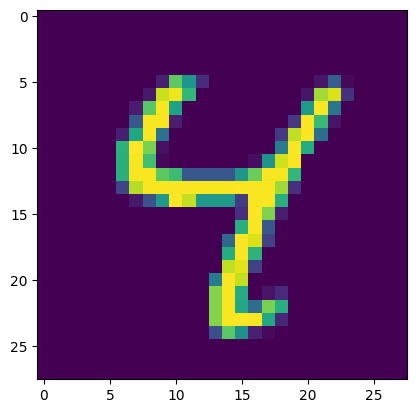

Predicted Digit: 4. Actual Digit: 4


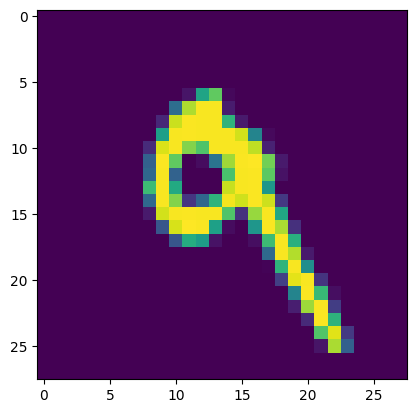

Predicted Digit: 9. Actual Digit: 9


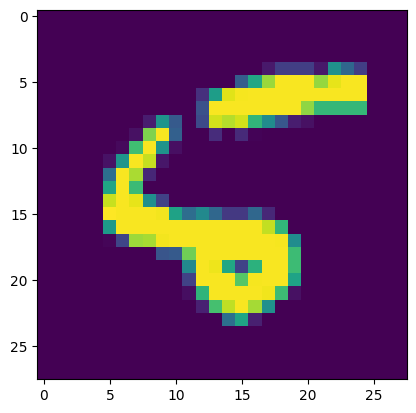

Predicted Digit: 6. Actual Digit: 5


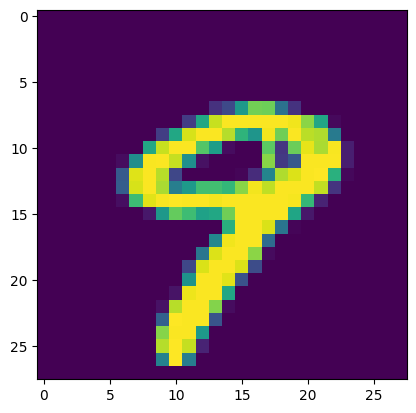

Predicted Digit: 9. Actual Digit: 9


In [7]:
# evaluation mode. don't worry about calculating derivative as it's not for training
model.eval()

for image, label in subset_test_data:
  image = image.view(image.shape[0], 784)
  prediction = model(image)
  # get max from the model prediction over row (dim=1)
  # max is the result
  max, idx = torch.max(prediction, dim=1)
  for i in range(len(image)):
    plt.imshow(image[i].view(28, 28))
    plt.show()
    print(f'Predicted Digit: {idx[i].item()}. Actual Digit: {label}')


In [ ]:
d